###### 2020-10-29 목요일

###### 2020-10-30 금요일

# 04_분류성능평가지표

###### 수식을 몰라도 모델의 성능 평가를 도와주는 함수들이 존재한다.
###### 그래도 한 번 공부해보는 시간을 가지자

### 목차

#### 1. confusion_matrix

#### 2. 민감도와 특이도

#### 3. 정밀도와 재현율

#### 4. 실습

#### 5. 정밀도/재현율의 트레이드오프

#### 6. ROC / AUC

# sklearn.metrics
   - confusion_matrix(answer, prediction)
   - accuracy_score()
   - precision_score()
   - recall_score()
   - f1_score()
   - classification_report()
   - roc_curve()
   - auc()

## 1. confusion_matrix

In [1]:
from sklearn.metrics import confusion_matrix

##### confusion_matrix를 구현해보자

In [2]:
y_real = [1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

tp = tn = fp = fn = 0

for i in range(len(y_real)):
    if y_real[i] == 1 & y_pred[i] == 1:
        tp += 1
    elif y_real[i] == 0 & y_pred[i] == 0:
        tn += 1
    elif y_real[i] == 1 & y_pred[i] == 0:
        fn += 1
    elif y_real[i] == 0 & y_pred[i] == 1:
        fp += 1
        
        
print('TP :', tp)
print('FP :', fp)
print('TN :', tn)
print('FN :', fn)

TP : 3
FP : 0
TN : 3
FN : 0


In [3]:
confusion_matrix(y_real, y_pred)

array([[0, 3],
       [4, 3]], dtype=int64)

### 예를들어 `TP`, `TN`, `FP`, `FN`을 설명해보자
### 제품을 생산하는 제조공장에서 품질 테스트를 실시하여 불량품을 찾아내고 싶다.


- 불량품(Positive) : 1
- 정상품(Nagative) : 0





   - 불량품을 골라내어 공장으로 돌려보내려한다.
   - 이때, 품질 테스트의 결과가 양성이다. : 불량품으로 분류
   - 이때, 품질 테스트의 결과가 음성이다. : 정상품으로 분류
   - True Positive   : 실제 불량품인 제품을 불량품으로 분류한 경우
   - True Nagative   : 실제 정상품인 제품을 정상품으로 분류한 경우
   - False Positive  : 실제 정상품인 제품을 불량품으로 분류한 경우
   - False Nagative  : 실제 불량품인 제품을 정상품으로 분류한 경우
   
   
###### 아래 그림을 참조하라

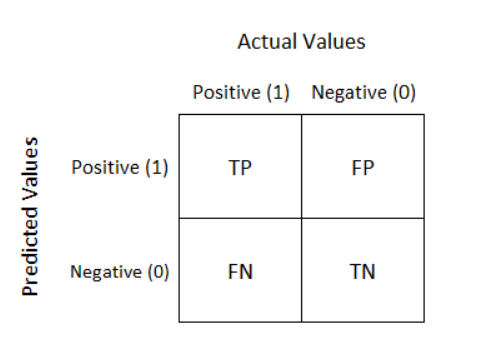

In [4]:
from PIL import Image
Image.open('./실습데이터/confusion_matrix.PNG')

In [5]:
y_true = [1, 0, 1, 1, 0, 1]
y_test = [0, 0, 1, 1, 0 ,1]

confusion_matrix(y_true, y_test)

array([[2, 0],
       [1, 3]], dtype=int64)

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## 2. 민감도와 특이도

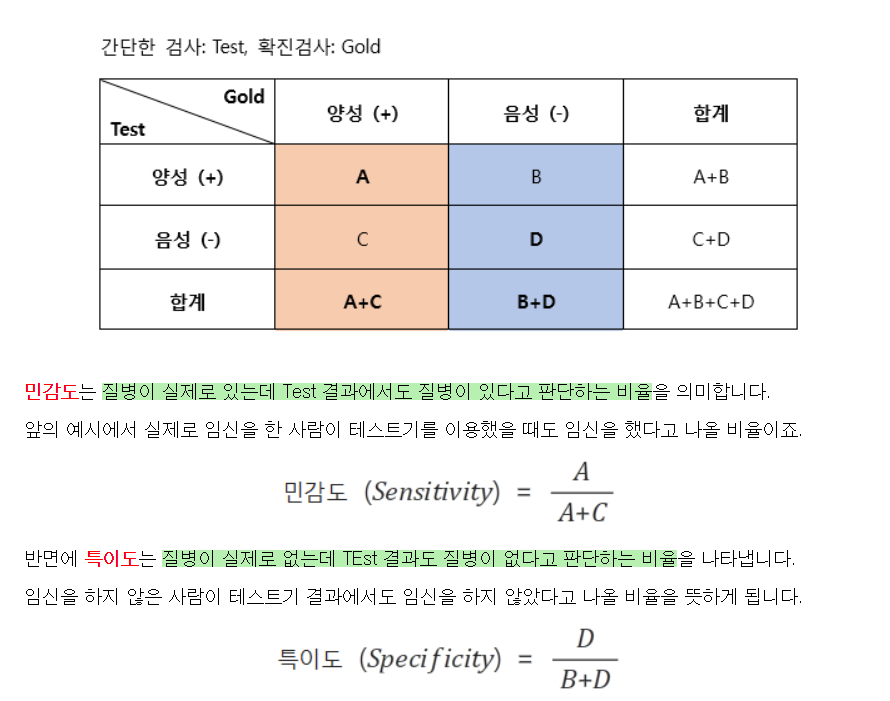

In [7]:
Image.open('./실습데이터/민감도_특이도.PNG')

# 아래 그림의 출처 https://mansoostat.tistory.com/41

## 3. 정밀도와 재현율

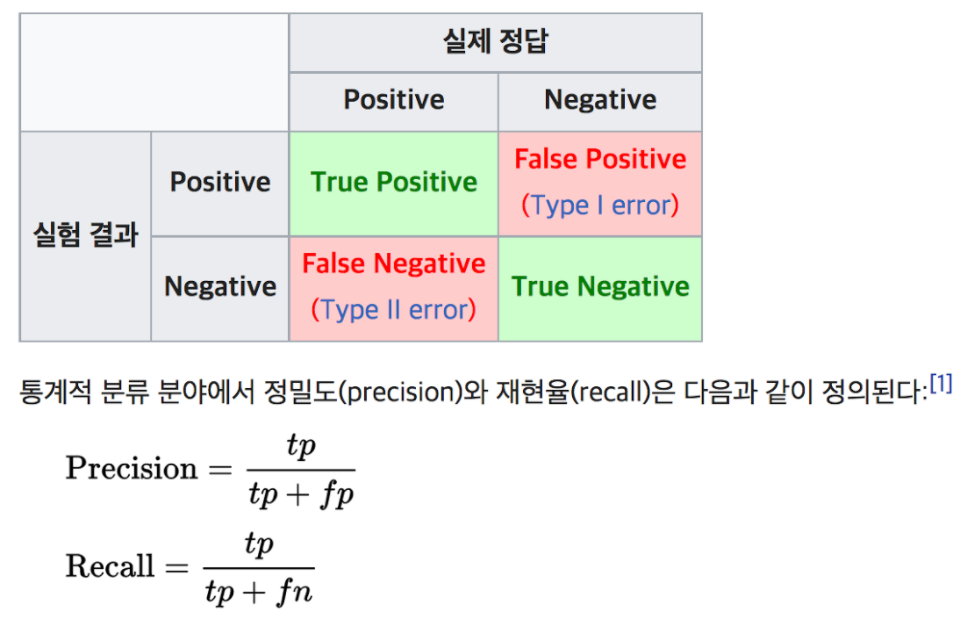

In [8]:
Image.open('./실습데이터/정밀도_재현율.PNG')

# 아래 그림의 출처 https://2.bp.blogspot.com/-0KVYxYveQ88/Wb8nI1LZC3I/AAAAAAAA4kQ/2jmSU7eNMJQYrRI_tDoo1PBmTZkO1ANvwCLcBGAs/s1600/ScrShot%2B1.png

###### Titanic 데이터를 사용하여
###### 머신러닝이 아니라 성별에 따라 임의의 분류기인 `MyDummyClassifier`를 사용해보자

In [9]:
### fit() 메서드는 아무 것도 수행하지 않고, predict()는 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측하는 단순한 분류기 생성
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit 메서드는 아무것도 학습하지 않음
    def fit(self, X, y=None):
        pass
    # predict 메서드는 단순히 Sex 피처가 1이면 0, 아니면 1로 예측
    def predict(self, X):
        pred = np.zeros( (X.shape[0],1) )
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1 
        return pred

## 4. 실습

##### 데이터를 불러오고 전처리를 시행하자

In [10]:
titanic = pd.read_csv('./실습데이터/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
titanic_label= titanic['Survived']
titanic_feature_df = titanic.drop(['Survived'], axis=1, inplace=False)


In [12]:
## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [13]:
titanic_feature_df = transform_features(titanic_feature_df)

##### train과 test로 데이터를 나눈다

In [14]:
X_train, X_test, y_train, y_test = train_test_split(titanic_feature_df, 
                                                    titanic_label, 
                                                    test_size = 0.2,
                                                    random_state = 10)

##### 모델예측

In [15]:
dummy_model = MyDummyClassifier()
dummy_model.fit(X_train, y_train)
y_pred = dummy_model.predict(X_test)

##### 모델의 성능 평가지표
   - **데이터에 따라서 사용하고자 하는 지표를 정하여 사용해야한다.**
       - `Recall` : 암, 사기판정
       - `Precision` : 스팸메일 분류
 

In [16]:
from sklearn.metrics import recall_score, precision_score

In [17]:
def display_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print('confusion :\n', confusion)
    print()
    print('accuracy  :', accuracy)
    print('precision :', precision)
    print('recall    :', recall)

In [18]:
display_eval(y_test, y_pred)

confusion :
 [[104  13]
 [ 19  43]]

accuracy  : 0.8212290502793296
precision : 0.7678571428571429
recall    : 0.6935483870967742


##### Logistic Regression 사용해보기

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

In [21]:
display_eval(y_test, y_pred)

confusion :
 [[101  16]
 [ 15  47]]

accuracy  : 0.8268156424581006
precision : 0.746031746031746
recall    : 0.7580645161290323


##### 수기로 accuracy, precision, recall을 계산해보자

In [22]:
confusion= confusion_matrix(y_test, y_pred)

In [23]:
print('accuracy  :',(101 + 47) / (101 + 16 + 15 + 47))
print('precision :', 47 / (47 + 16) )
print('recall    :', 47 / (47 + 15))

accuracy  : 0.8268156424581006
precision : 0.746031746031746
recall    : 0.7580645161290323


## [실습]
   - 유방암데이터
   - 유방암을 진단하는 데이터는 재현율(`recall`)이 중요하다.(오진을 내서는 안되기 때문이다.)
   - 앙상블 모델인 `RandomForest`를 사용한다

In [24]:
from sklearn.datasets import load_breast_cancer

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

import pandas as pd
import numpy as np

##### 유방암 진단 데이터 불러오기

In [25]:
cancer = load_breast_cancer()

##### 유방암 진단 데이터를 데이터프레임으로 만들어 데이터를 확인해보자

In [26]:
cancer_df = pd.DataFrame(cancer.data,
                        columns = cancer.feature_names)

cancer_df['target'] = cancer.target

cancer_df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [27]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### 분류학습기 생성
 - 학습 및 평가 (교차 검증)
 - 평가지표에 대한 평균값을 구해보자




In [28]:
# Train, Test 나누기

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size=0.2)

In [29]:
# 그리드 서치

from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(random_state=123)


params = {
    'n_estimators' : [200, 300],
    'max_features' : [8, 10],
    'max_depth'    : [4, 6]
}


Grid_rf = GridSearchCV(random_forest, 
                       param_grid = params,
                       cv         = 3,
                       scoring    = 'recall')

Grid_rf.fit(X_train, y_train)
print(Grid_rf.best_params_)
print(Grid_rf.best_score_)

# {'max_depth': 4, 'max_features': 8, 'n_estimators': 200}
# 0.9669922669922671

{'max_depth': 6, 'max_features': 10, 'n_estimators': 200}
0.9609929078014184


In [30]:
# test set 예측

y_pred = Grid_rf.best_estimator_.predict(X_test)

In [31]:
# 모델성능평가 함수
def display_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print('confusion :\n', confusion)
    print()
    print('accuracy  :', accuracy)
    print('precision :', precision)
    print('recall    :', recall)
    print('f1    :', f1)

In [32]:
# 모델 성능 평가
display_eval(y_test, y_pred)

confusion :
 [[39  0]
 [ 5 70]]

accuracy  : 0.956140350877193
precision : 1.0
recall    : 0.9333333333333333
f1    : 0.9655172413793104


## 5. 정밀도/재현율의 트레이드오프

 - 분류(Classfier)모델은 내부 알고리즘적으로 따지자면 라벨(Label : 0 또는 1)을 리턴하는 것이 아니라 확률 값을 리턴한다.
 - 즉, 1로 분류할 확률을 리턴하는 것이다.
 - 이때, 확률이 몇 이상일때, 1로 두자 라는 기준이 있는데 이 기준을 **Treshold**라고 한다.
 - 모든 모델의 **Treshold**의 기본값은 0.5이다.
 - 분석가에 따라 임의적으로 **Treshold** 값을 변경하여 모델의 성능평가 지표를 조정할 수 있다.



##### Titanic set을 이용해서 Threshold를 조정하는 실습을 진행해보자

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
titanic = pd.read_csv('./실습데이터/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
titanic_label= titanic['Survived']
titanic_feature_df = titanic.drop(['Survived'], axis=1, inplace=False)


In [36]:
## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [37]:
titanic_feature_df = transform_features(titanic_feature_df)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(titanic_feature_df, 
                                                    titanic_label, 
                                                    test_size = 0.2,
                                                    random_state = 10)

### 예측함수



#### 1. `.predict()` 함수를 사용하면 라벨값을 리턴해준다
   - Theshold의 기본값(디폴트값)은 0.5이다 
   
   
   
#### 2. `.predict_proba()`함수를 사용하면 라벨값이 아니라 확률값을 리턴해 준다
   - 확률값을 사용하면 임계치(Threshold)값을 분석가가 임의로 조절하여 모델의 성능평가지표들을 조정해 줄 수 있다

In [39]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_pred_prob = lr_model.predict_proba(X_test)

In [40]:
df = pd.DataFrame(np.concatenate( [y_pred_prob, y_pred.reshape(-1, 1)], axis=1 ),
            columns = ['label이 0일 확률', 'label이 1일 확률', 'label'])

df.head(10)

,label이 0일 확률,label이 1일 확률,label
0,0.906337,0.093663,0.0
1,0.853613,0.146387,0.0
2,0.877083,0.122917,0.0
3,0.073353,0.926647,1.0
4,0.106497,0.893503,1.0
5,0.849246,0.150754,0.0
6,0.856098,0.143902,0.0
7,0.857494,0.142506,0.0
8,0.897315,0.102685,0.0
9,0.861763,0.138237,0.0


##### BInarizer 클래스 fit_tranform()

In [41]:
from sklearn.preprocessing import Binarizer

##### Threshold = 0.5 일때

In [42]:
threshold = 0.5
positive_prob = y_pred_prob[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold = threshold)
binarizer.fit(positive_prob)
user_pred = binarizer.transform(positive_prob)

In [43]:
display_eval(y_test, user_pred)

confusion :
 [[101  16]
 [ 15  47]]

accuracy  : 0.8268156424581006
precision : 0.746031746031746
recall    : 0.7580645161290323
f1    : 0.752


##### Threshold = 0.4 일때

In [44]:
threshold = 0.2
positive_prob = y_pred_prob[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold = threshold)
binarizer.fit(positive_prob)
user_pred = binarizer.transform(positive_prob)

In [45]:
display_eval(y_test, user_pred)

confusion :
 [[75 42]
 [ 7 55]]

accuracy  : 0.7262569832402235
precision : 0.5670103092783505
recall    : 0.8870967741935484
f1    : 0.6918238993710691


##### Threhold를 낮추면,
   -  정밀도는 낮아지지만, 재현율은 높아진다
   - Threshold값을 조정하여 정밀도와 재현율의 값이 트레이드오프된다는 말은 이런 의미이다.

##### `precision_recall_curve(실제값, 예측확률값)`
   - Threshold값이 바뀔때, 정밀도와 재현율의 변화 값들을 리턴해주는 함수이다
   - 리턴된 값을 통해 Threshold의 변화에 따른 정밀도, 재현율의 변화정도를 시각화 할 수 있다.

In [46]:
from sklearn.metrics import precision_recall_curve

 - 로지스틱할때 사용했던 코드를 제사용하여 예측확률값을 구하자

In [47]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_pred_prob = lr_model.predict_proba(X_test)
positive_prob = y_pred_prob[:, 1]

In [48]:
precisions, recalls, thresholds = precision_recall_curve(y_test, positive_prob)
print('precision    :', precisions)
print('recall       :', recalls)
print('threshold    :', thresholds)

precision    : [0.35632184 0.35260116 0.35465116 0.35672515 0.35882353 0.36094675
 0.36309524 0.36526946 0.36746988 0.36969697 0.37195122 0.37423313
 0.37654321 0.37888199 0.38125    0.3836478  0.38607595 0.38853503
 0.39102564 0.39354839 0.3961039  0.39869281 0.40131579 0.40397351
 0.40666667 0.40939597 0.40540541 0.40136054 0.39726027 0.4
 0.40559441 0.4084507  0.41428571 0.42335766 0.42647059 0.42962963
 0.43283582 0.43939394 0.44274809 0.43846154 0.43410853 0.4375
 0.44094488 0.4516129  0.45528455 0.45901639 0.46280992 0.46666667
 0.47058824 0.47457627 0.47863248 0.48275862 0.47826087 0.48245614
 0.48672566 0.49107143 0.4954955  0.5        0.50458716 0.50925926
 0.51401869 0.51886792 0.52380952 0.52884615 0.53398058 0.53921569
 0.54455446 0.55       0.55555556 0.56701031 0.57291667 0.57894737
 0.58510638 0.6043956  0.61111111 0.61797753 0.625      0.63218391
 0.62790698 0.62352941 0.63095238 0.63855422 0.64634146 0.65432099
 0.65       0.65822785 0.65384615 0.66233766 0.65789474 0.

##### `precision_recall_curve()`함수에서 리턴받은 Threshold값에 따른 정밀도와 재현율의 변화 값을 이용해 시각화 해보자

In [49]:
import matplotlib.pyplot as plt

In [50]:
print(thresholds.shape)
print(precisions.shape)

(162,)
(163,)


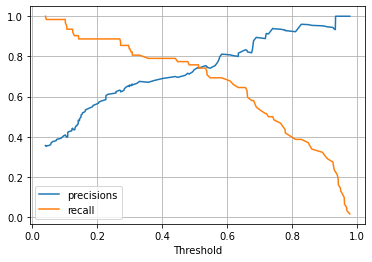

In [51]:
plt.plot(thresholds, 
         precisions[0:len(thresholds)], 
         label = 'precisions')

plt.plot(thresholds, 
         recalls[0:len(thresholds)], 
         label = 'recall')

plt.legend(loc=0)
plt.xlabel('Threshold')
plt.grid()

## 6. ROC / AUC
   - FPR : False Positive Rate
   - TPR : Ture Postive Rate
   
   
   
   ### ROC
   - Threshold값에 따른 FPR과 TPR의 변화 정도를 그린 그래프이다.
   - 간단히말해, FPR이 `1로 잘못 분류할 비율`, TPR이 `1로 잘 분류할 비율`로 설명하겠다.
   - 모든 Threshod에서 `1로 잘못 분류할 비율(FPR)`보다 `1로 잘 분류할 비율(TPR)`이 높아야 성능이 높다.
   - 즉 아래그림처럼 그래프의 곡선이 위로 볼록할 수록 좋은 성능이라는 뜻이다.
   
   
   ### AUC
   - AUC는 ROC 그래프의 곡선 밑의 넓이를 뜻한다.
   - 수치가 1에 가까울 수록 성능이 좋은 모델이다

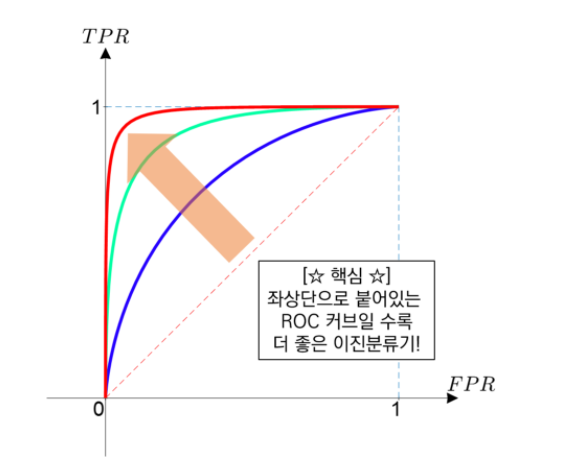

In [52]:
Image.open('./실습데이터/ROC.PNG')

# 아래 그림의 출처 https://angeloyeo.github.io/2020/08/05/ROC.html

##### Titanic data를 이용해 ROC를 그려보자
   - `precision_recall_curve()`를 이용해 그린방법과 똑같이 `roc_curve()`함수를 이용해 그릴 수 있다.
   - 자세한 사용법은 아래 코드를 참고하라

In [53]:
from sklearn.metrics import roc_curve

 - 위에서 했던거 다시한번 더가져옵시다.. ㅎ

In [54]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
y_pred_prob = lr_model.predict_proba(X_test)
positive_prob = y_pred_prob[:, 1]

In [55]:
fpr_array, tpr_array, threshold_array = roc_curve(y_test, positive_prob)

 - 그래프 위에 Threshold 값을 표시해주자

In [56]:
threshold_idx = np.arange(1, len(threshold_array), 6)
x = fpr_array[threshold_idx]
y = tpr_array[threshold_idx]

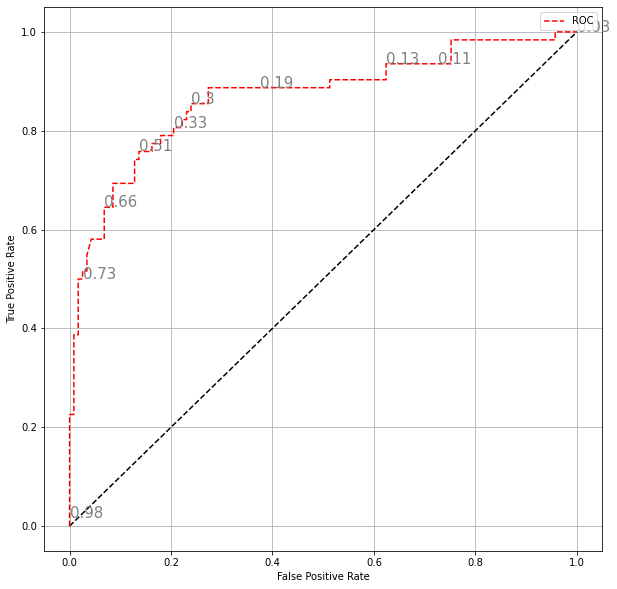

In [61]:
plt.rcParams["figure.figsize"] = (10, 10)

plt.plot([0, 1], [0,1], ls='--', label=None, c='black')
plt.plot(fpr_array, tpr_array, ls='--', c='red', label='ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0)

for idx in threshold_idx:
    text = str(round(threshold_array[idx], 2))    
    plt.text(fpr_array[idx], tpr_array[idx], text,
             fontsize=15, 
            color = 'gray')
    
plt.grid()

##### 이제 ROC의 아래면적인 AUC를 구해보자

In [58]:
from sklearn.metrics import roc_auc_score

In [59]:
auc = roc_auc_score(y_test, positive_prob)
print('AUC의 수치는? :', auc)

AUC의 수치는? : 0.8679349324510613
